In [ ]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statsmodels.api as sm
import subprocess
import os

In [436]:
area_size=10
area_discretization=10000
time_end=1000
time_step=10
initial_pop=500
birth_rate=6e-3
death_rate=1e-5
birth_var=2e-1
death_var=0.001
seed=2

params=[u"C:/Users/Egor/Desktop/Simulatorsgithub/matbio/PoissonSimulator/simulator.exe",\
    area_size,area_discretization,time_end,time_step,initial_pop,birth_rate,death_rate,birth_var,death_var,seed]



params=map(str,params)
result = subprocess.check_output(params)
traj = pd.read_csv(u"C:/Users/Egor/Desktop/Simulatorsgithub/matbio/PoissonSimulator/build/apps/traj.txt", comment='#', header=None)


In [438]:
traj=traj.iloc[:,1:]

In [439]:
time_slice=int(time_end/time_step)

coordinates=[]
for i in range(0,traj.max(axis=1).max()):
    for j in range(0,i):
        coordinates.extend(traj.columns[traj.iloc[time_slice,:]==i])

In [440]:
df=pd.DataFrame(coordinates).sort_values(0)
df["key"]=0
df["index"]=range(0,len(coordinates))
distances=pd.merge(df,df,on = 'key')

In [449]:
distances_filtered=distances[distances.index_y>distances.index_x]
distances_filtered.head()
distances_filtered=distances_filtered.assign(dist=abs(distances_filtered['0_x']-distances_filtered['0_y'])/area_discretization*area_size)

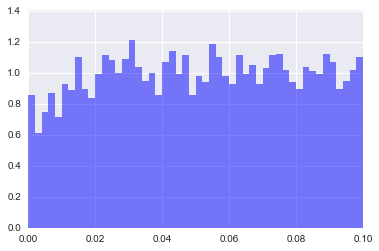

In [484]:
N=5000
data_s=np.array(distances_filtered['dist'].sort_values(0),dtype=np.double)

n, bins, patches = plt.hist(data_s,bins=np.linspace(0,N,N)/N*area_size, facecolor='blue', alpha=0.5,weights= np.repeat(0.5*N/data_s.size,data_s.size))
axes = plt.gca()
axes.set_xlim([0,.1])
plt.show()

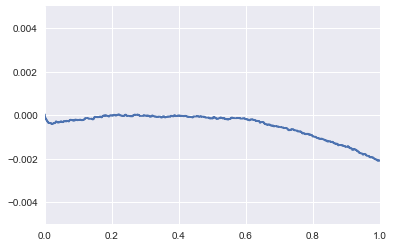

In [485]:
ecdf = sm.distributions.ECDF(data_s)

x = np.linspace(min(data_s), max(data_s),N)
y = ecdf(x)/2-x/area_size
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-0.005,0.005])
plt.step(x, y)
plt.show()